# Project description

Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. You can read more about their marketplace [here](https://www.lendingclub.com/company/about-us?).

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. You can read more about the interest rate that Lending Club assigns [here](https://www.lendingclub.com/loans/personal-loans/rates-fees). Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination](https://help.lendingclub.com/hc/en-us/articles/214463677) fee that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers default on the loan.

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. At first, you may wonder why investors put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.


Lending Club releases data for all of the approved and declined loan applications periodically on their [Website](https://www.lendingclub.com/investing/peer-to-peer).

In this project, we'll focus on approved loans data from 2007 to 2011, since a good number of the loans have already finished. You'll find the dataset in 'data/loans_2007.csv'.

You'll also find a [data dictionary](data/LCDataDictionary.xlsx) (in XLS format) which contains information on the different column names.


# Problem Statement

We would like to build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not.

# Instructions

1. Read and explore the dataset.
2. Perform data cleaning tasks that are useful to model our problem.
3. Define what features we want to use and which column represents the target column we want to predict. 
4. Perform necessary data preparation to start training machine learning models.
5. 
    a. Make predictions about whether or not a loan will be paid off on time.

    b. Our objective is to fund enough loans that are paid off on time to offset our losses from loans that aren't paid
    off. An error metric will help us determine if our algorithm will make us money or lose us money. Select an error metric that will help us figure out when our model is performing well, and when it's performing poorly.
7. Evaluate your model.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
mydata = pd.read_csv("./data/loans_2007.csv", index_col=0)
mydata.head()

/home/icipe/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [5]:
## make copies of the data sets
mydata_original = mydata.copy()
#mydata_original

In [6]:
##Explore the dataset
mydata.dtypes
mydata.count()
mydata.shape

(42538, 51)

In [7]:
## Check data for missing values
## Cleaning the data
mydata.isna()
mydata_clean = mydata.dropna()
mydata_clean.isna()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1076863,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1075358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1075269,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1069639,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150070,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
mydata_clean.shape
mydata_clean.columns
#mydata_clean.plot()

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [25]:
##Filter data to remain with relevant columns
##Plot the data to have a clearer view of what we are working with
clean_data=mydata_clean[['loan_amnt','term','installment','grade','loan_status','pymnt_plan', 'purpose', 'title','last_credit_pull_d','collections_12_mths_ex_med', 'policy_code', 'application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies', 'tax_liens']]
clean_data.columns
clean_data.dtypes
#print(clean_data['loan_status'].value_counts())


loan_amnt                     float64
term                           object
installment                   float64
grade                          object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
last_credit_pull_d             object
collections_12_mths_ex_med    float64
policy_code                   float64
application_type               object
acc_now_delinq                float64
chargeoff_within_12_mths      float64
delinq_amnt                   float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object

<AxesSubplot:xlabel='id'>

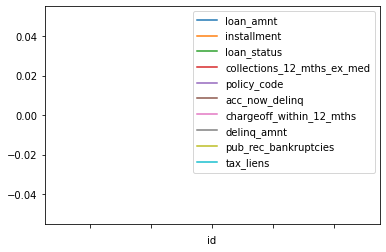

In [22]:
#two statuses that are useful to lending club are fully paid and charged off
clean_data = clean_data[(clean_data["loan_status"] == "Fully Paid") |
(clean_data["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
clean_data = clean_data.replace(mapping_dictionary)
clean_data.plot()
https://www.dataquest.io/blog/machine-learning-preparing-data/